In [1]:
%reset -f 
nf=2
%run pylib/ml_analysis dark  title "Study ML analysis with $nf features"
self = FileAnalysis(f'files/dr4_2_class_{nf}_features.csv')


# Study ML analysis with 2 features

<h5 style="text-align:right; margin-right:15px"> 2024-07-11 12:14</h5>

* Loaded `files/dr4_2_class_2_features.csv`, selected "0.1<Ep<10 & variability<25 & Fp<10" 

subset,blazar,msp,psr,unID
Sources,454,125,18,2016


## Examine $P_{pulsar}$ dependence

### Projected

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6c00d015a0>
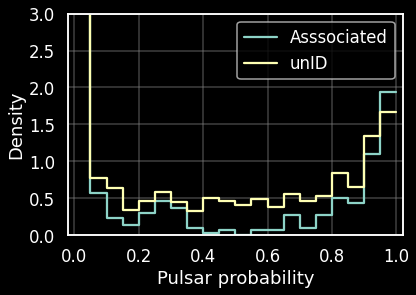

### Peak flux $F_p$ (**not** used as an ML feature)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6c00c73a00>
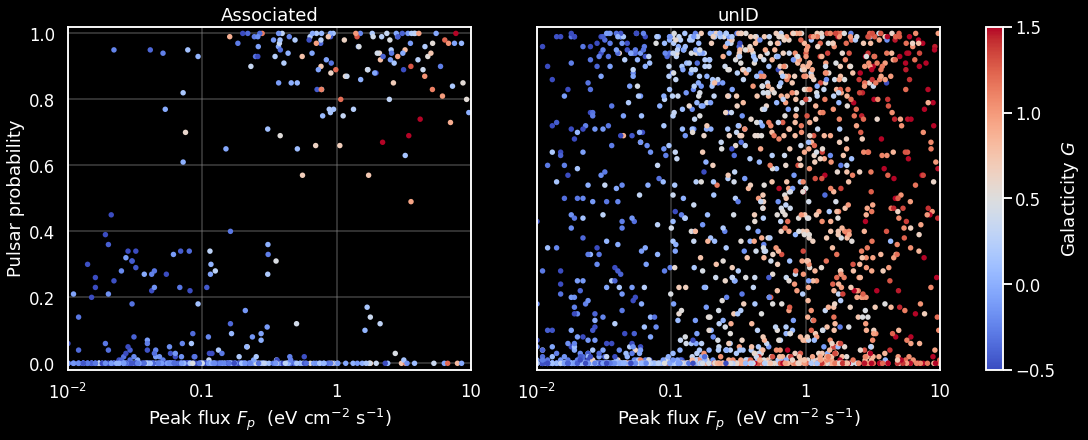

### Curvature $d$ 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6c005910c0>
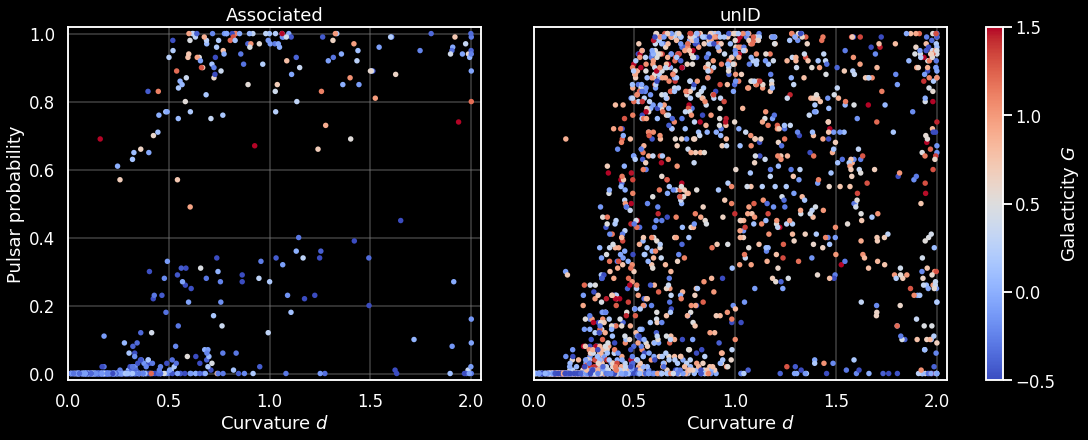

### Peak energy $E_p$ 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6c00496080>
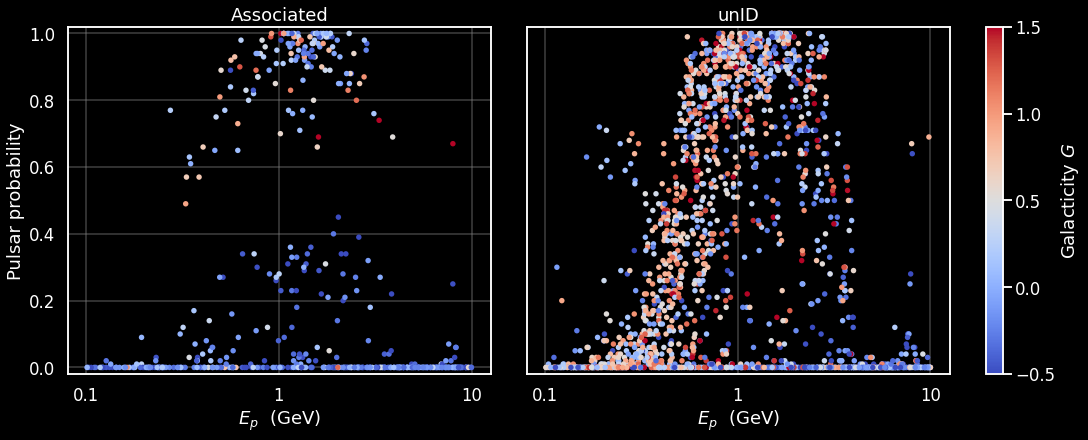

In [2]:
show("""## Examine $P_{pulsar}$ dependence""")
show("""### Projected""")
fig, ax = plt.subplots(figsize=(6,4))
kw = dict(ax=ax, x='p_pulsar',stat='density', bins=np.arange(0,1.01, 0.05), element='step', fill=False)
sns.histplot(self.assoc, **kw, label='Asssociated')
sns.histplot(self.unid,  **kw, label='unID')
ax.legend(); ax.set(**pulsar_kw('x'), ylim=(0,3));
show(fig)
show("""### Peak flux $F_p$ (**not** used as an ML feature)""") 
show_fig(self.multi_pulsar_vs_x, 'log_fpeak', );
show(""" ### Curvature $d$ """)  
show_fig(self.multi_pulsar_vs_x,'d', );
show(f"""### Peak energy $E_p$ """)   
show_fig(self.multi_pulsar_vs_x,'log_epeak', );
                  

In [3]:
show(f"""### Separate the unID's
""")

show(f"""* Label these populations I, $E_p<1$ GeV, else II,
 excluding those within {(tol:=0.15)} of $P_{{pulsar}}$ boundaries.""")
unid = self.unid.copy()
def IvsII(s): 
    p = s.p_pulsar
    # if s.Fp>4: return 'high-flux'
    if p<tol: return 'agn-like'
    if p>1-tol: return 'psr-like'
    return 'I' if s.log_epeak < 0 else 'II'
unid['population'] = unid.apply(IvsII, axis=1)
show(pd.Series(unid.groupby('population').size(),name='Number'))


### Separate the unID's

* Label these populations I, $E_p<1$ GeV, else II,
excluding those within 0.15 of $P_{pulsar}$ boundaries.

population,I,II,agn-like,psr-like
Number,474,224,948,370


### Compare the two apparent unknown populations 

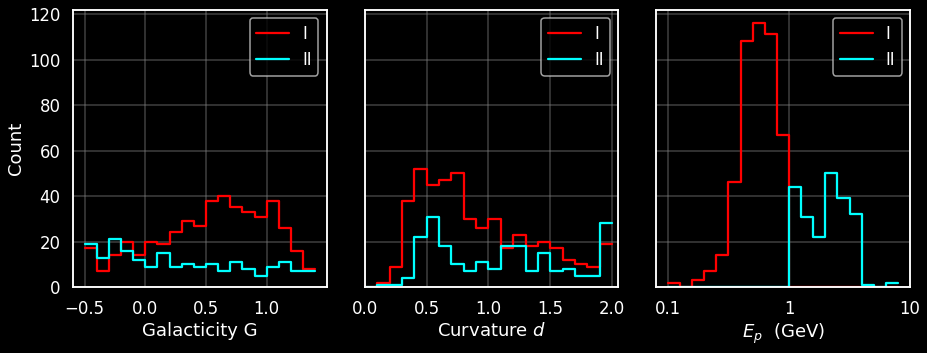

In [4]:
show(f"""### Compare the two apparent unknown populations """)

bind = dict(diffuse=np.arange(-0.5,1.5, 0.1),
           d=np.arange(0, 2.05, 0.1),
           log_fpeak = np.arange(-2,2.1, 0.25),
            log_epeak = np.arange(-1,1,0.1),
            significance=np.arange(4,20,1),
           )
fig, axd = plt.subplot_mosaic(
    [ ['diffuse',   'd', 'log_epeak',]
    ],  figsize=(15,5), sharey=True, 
    gridspec_kw=dict(hspace=0.3, wspace=0.15),
)
hkw = dict( #bins=np.arange(-0.5,1.51, 0.1),
           element='step', stat='count', fill=False,)
           # edgecolor=('w' if dark_mode else 'k'), alpha=0.2,     )
for label, ax in axd.items():
    sns.histplot(unid.query('population=="I"'), ax=ax, x=label, **hkw, bins=bind[label],  color='red',  label='I');
    sns.histplot(unid.query('population=="II"'),ax=ax, x=label, **hkw, bins=bind[label],  color='cyan', label='II');
    ax.set(** dict(d=d_kw(), log_epeak=epeak_kw(), log_fpeak=fpeak_kw(), 
                   diffuse=dict(xlabel='Galacticity G')).get(label, {} ))
# sns.histplot(egal.diffuse, **hkw, color='green', label='egal');
    ax.legend();

# Study $d$ vs $E_p$

##  $P_{pulsar}$ hue

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6c0024f8b0>
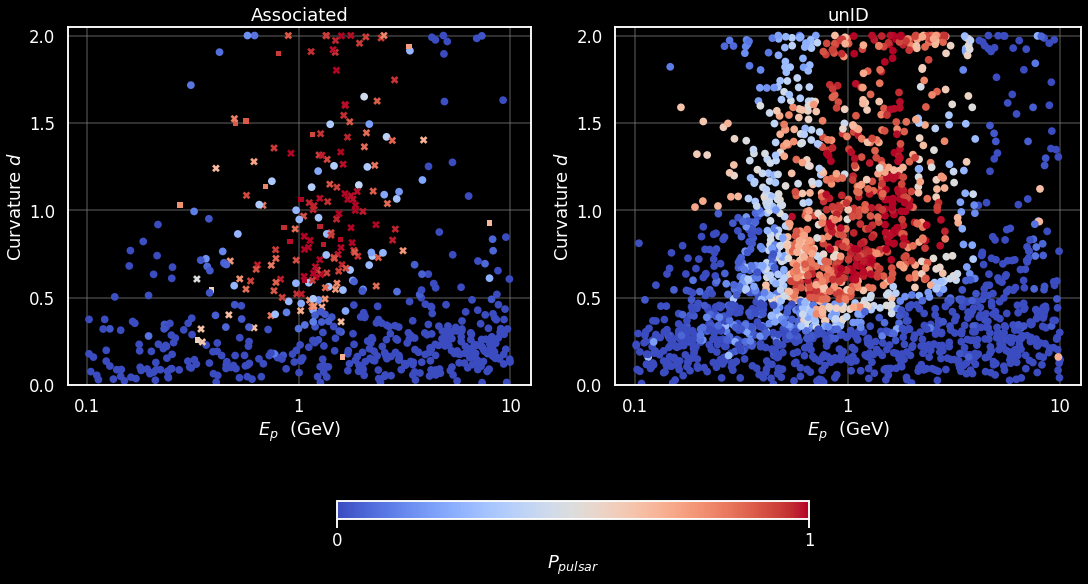

Showing unID with $0.15< P_{pulsar} < 0.85$.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6c001a2500>
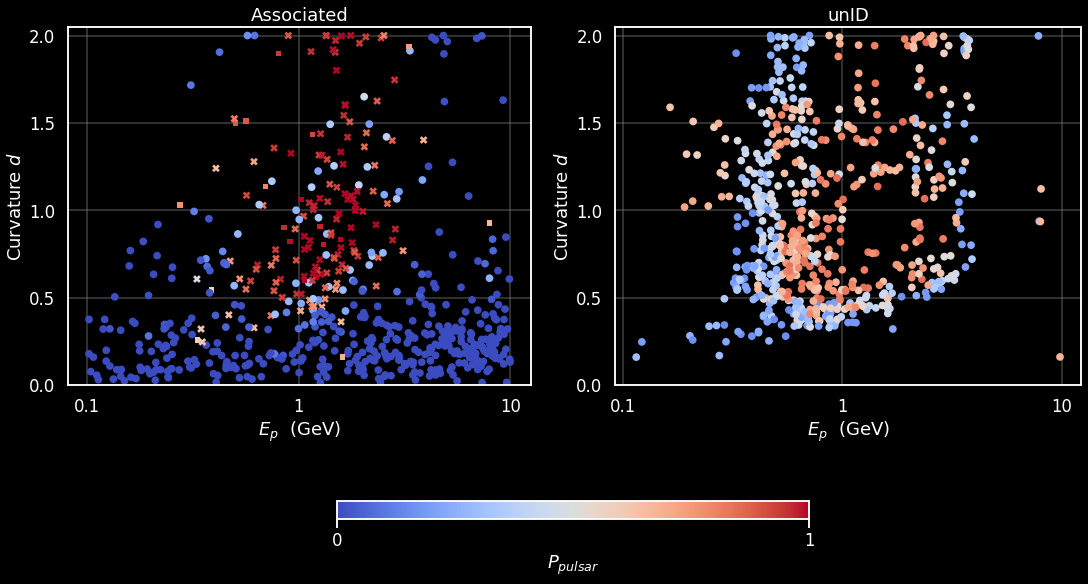

In [5]:
def d_vs_ep(self, unid_cut='0.15<p_pulsar<0.85', hue='p_pulsar',hue_norm=None):
    fig, axd = plt.subplot_mosaic(
                'AAUU;.CC.',   height_ratios=[20,1],
                gridspec_kw=dict(hspace=0.2),
                figsize=(15,8), sharey=False, layout='constrained')
    if hue_norm is None:
        hue_norm = (0,1) if hue=='p_pulsar' else (-0.5,1.5)
    scat_kw=dict( y='d', x='log_epeak', s=60, edgecolor='none', legend=False,
                           hue=hue, hue_norm=hue_norm, 
                 palette=sns.color_palette('coolwarm', as_cmap=True))
    for key, ax in axd.items():
        if key=='U':
            unid = self.unid.query(unid_cut) if unid_cut else self.unid
            sns.scatterplot(unid, ax=ax, **scat_kw)
            ax.set(**epeak_kw('x'), **d_kw('y'), title='unID', )        
        elif key=='A':
            sns.scatterplot( self.assoc, ax=ax, **scat_kw, style='subset' )
            ax.set(**epeak_kw('x'), **d_kw('y'), title='Associated')
        else:
            gbar(ax, orientation='horizontal',
                 label='$P_{pulsar}$' if hue=='p_pulsar' else 'Galacticity',
                 norm=hue_norm,  ticks=hue_norm)
    return fig
show("""# Study $d$ vs $E_p$""")
show("""##  $P_{pulsar}$ hue""")
show_fig(d_vs_ep, self, None)
show(""" Showing unID with $0.15< P_{pulsar} < 0.85$.""")         
show_fig(d_vs_ep, self,)
# self.assoc.groupby('subset').size()

### Galacticity reduced hue (0,1)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6be02de530>
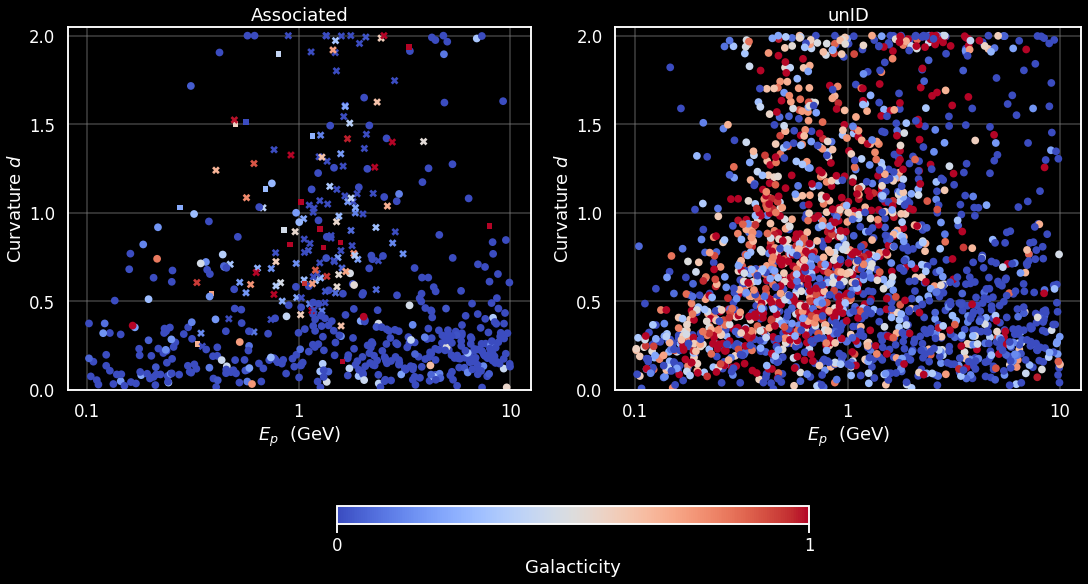

In [6]:
show("""### Galacticity reduced hue (0,1)""")
show_fig(d_vs_ep, self,  hue='diffuse', unid_cut=None, hue_norm=(0,1))

### Galacticity plots

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6be0187340>
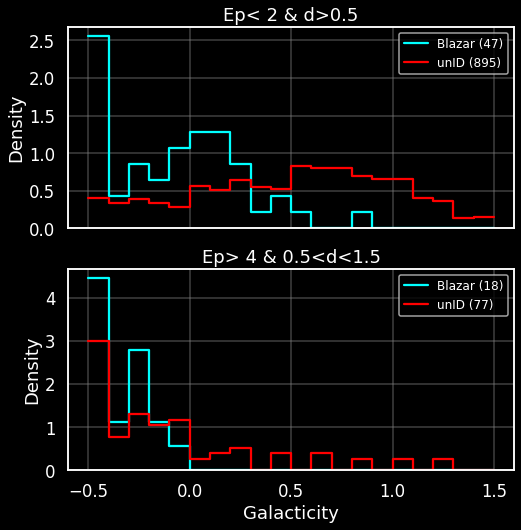

In [7]:
def Ghists(cut, ax=None, ):
    fig, ax = plt.subplots(figsize=(10,6)) if ax is None else (ax.figure, ax)
    kw = dict( x='diffuse', element='step', stat='density', fill=False, 
              bins=np.arange(-0.5,1.51, 0.1), )
    sns.histplot((d:=self.assoc.query(cut+' & subset=="blazar"')),ax=ax, color='cyan', **kw, 
                 label=f'Blazar ({len(d)})');
    # sns.histplot(self.assoc.query(cut+' & subset=="msp"'), **kw, label='MSP');
    sns.histplot((d:=self.unid.query(cut)), ax=ax, color='red', **kw,  label=f'unID ({len(d)})');
    ax.set(xlabel='Galacticity', xticks=np.arange(-0.5,1.51,0.5))
    ax.legend(fontsize=12)
    ax.set_title(cut)
    return fig
show(f"""### Galacticity plots""")
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8,8), sharex=True)
Ghists( ax=ax1, cut='Ep< 2 & d>0.5'); 
Ghists( ax=ax2, cut='Ep> 4 & 0.5<d<1.5')
show(fig)

## Examine the LP $E_{peak}$ uncertainty 
(A little concern: the uncertainty is probably Gaussian in log(E).)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6be01fae90>
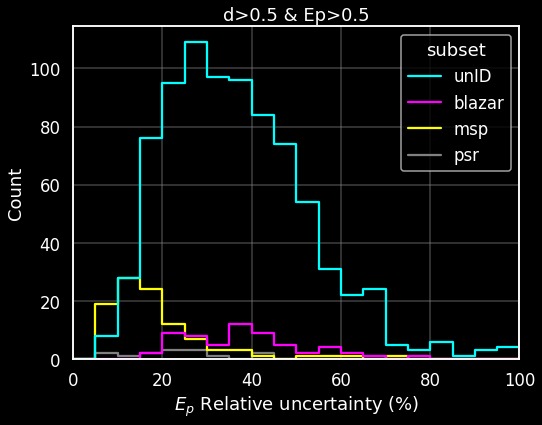

**The unID uncertainty is three times larger than msp!**

In [8]:
show(r"""## Examine the LP $E_{peak}$ uncertainty 
(A little concern: the uncertainty is probably Gaussian in log(E).)
""")
df = self.data.query((q:='d>0.5 & Ep>0.5'))

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x=(100*df.Ep_unc/df.Ep).clip(0,100),
             bins=np.arange(0,101,5),
             stat='count', fill=False,element='step',
            hue='subset', palette=palette+['0.5']);
ax.set(title=q, xlim=(0,100), xlabel='$E_p$ Relative uncertainty (%)')
show(fig)
show(f"""
**The unID uncertainty is three times larger than msp!**
""")

In [9]:
show(f"""# Compare with Dima's "Gaussian" list""")
dima_pdf = pd.read_csv(
    'files/4FGL-DR4_v34_4classes_GMM_no_bcu_spp_no_coord_features_unas_unk_prior_shift_npar4_1Gauss_prob_cat_select_Gauss.csv', 
    index_col=0)
dima_list= np.array(list(map(lambda x: x[:17],dima_pdf.index)))
# sns.scatterplot(unid.loc[dima_list], x='log_epeak', y='d');
show(f"""In my unID: {sum((good_index:=np.isin(unid.index, dima_list)))}
 out of {len(dima_list)}""")

# Compare with Dima's "Gaussian" list

In my unID: 69
out of 93

In [10]:
bad_index = dima_list[~np.isin(dima_list, unid.index)]
len(bad_index)

24

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6be01b6bc0>
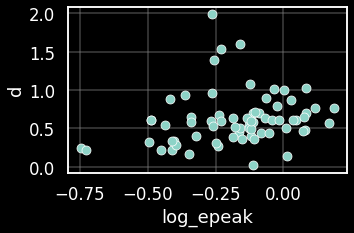

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6c00276c50>
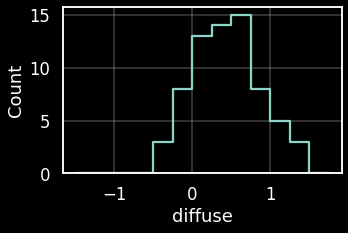

In [11]:
gdf = unid[good_index]
show(sns.scatterplot(gdf, x='log_epeak', y ='d').figure)

show(sns.histplot(gdf, x='diffuse', element='step', fill=False,
                  bins=np.arange(-1.5,2,0.25),
                 ).figure)

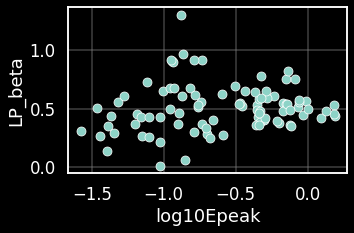

In [12]:
sns.scatterplot((df:=dima_pdf), x=df.log10Epeak, y=2*df.LP_beta);

Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6bd64e7fa0>
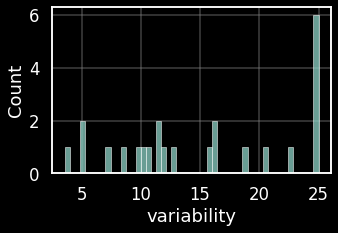

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f6bd5a1c8e0>
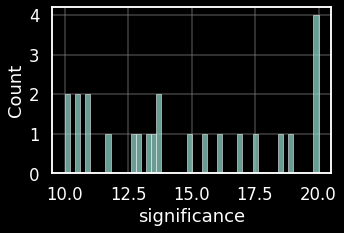

In [13]:
from pylib.catalogs import Fermi4FGL
dr4 = Fermi4FGL()
df= dr4.loc[bad_index] #dima_list]
show(sns.histplot(df, x=df.variability.clip(0,25), bins=50).figure)
show(sns.histplot(df, x=df.significance.clip(0,20), bins=50).figure)

In [14]:
adf = FileAnalysis(query='variability<1e4')

# Study ML analysis with 2 features

<h5 style="text-align:right; margin-right:15px"> 2024-07-11 12:14</h5>

* Loaded `files/dr4_2_class_classification.csv`, selected "variability<1e4" 

subset,blazar,msp,psr,unID
Sources,2265,176,140,3902


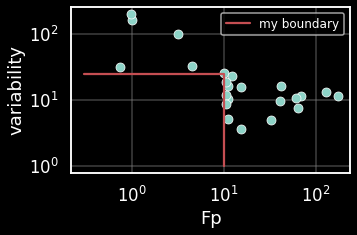

In [25]:
adata = adf.data; #print(len(adata))
sum(np.isin(bad_index, adata.index))

qdf = adata.loc[np.isin(adata.index, bad_index), 'Ep Fp  variability'.split()]
qdf['bad'] = (qdf.variability>25) | (qdf.Fp>10) 
ax=sns.scatterplot(qdf, x='Fp', y='variability')
ax.set(xscale='log', yscale='log');
ax.plot([0.3,10,10], [25,25,1], '-r', label='my boundary');
ax.legend(fontsize=12);

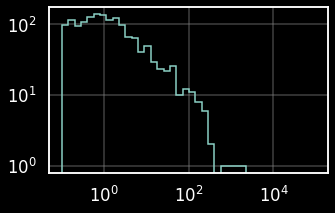

In [24]:
plt.hist(adata.query('association=="unID" & Ep<10 & d>0.3').Fp, histtype='step', 
         bins=np.logspace(-1,5,41),log=True) 
plt.gca().set(xscale='log');# element='step', fill=False);


In [ ]:
show("""---""");assert False, 'Done'

In [ ]:
show(f"""## Select unID subset with low curvature!
It appears that there are many with intemediate Galacticity.
<br>The cut: {(cut:='d<0.5 & p_pulsar>0.15')}
""")
dflg = self.unid.query(cut).copy()
show(f""" Selects {len(dflg)} sources""")

In [ ]:
if False:
    show(f"""## Galacticity""")
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(self.assoc, x=self.assoc.diffuse.clip(-0.5,1.5), hue='association',
                 stat='density', common_norm=False,
                 element='step', fill=False, bins=np.arange(-0.5,1.51,0.1)); 

In [ ]:
show(f"""## Load PLEC_EPeak and its error from 4FGL-DR4 to study uncertainty""")
from pylib.catalogs import *
dr4 = Fermi4FGL()
plec_ep = pd.Series( dr4.field('PLEC_EPeak').astype(np.float32), dr4.index, name='plec_ep'); 
plec_ep_unc =  pd.Series( dr4.field('unc_PLEC_EPeak').astype(np.float32), dr4.index, name='plec_ep_unc'); 
lp_ep = pd.Series( dr4.field('LP_EPeak').astype(np.float32), dr4.index, name='lp_ep'); 
lp_ep_unc =  pd.Series( dr4.field('unc_LP_EPeak').astype(np.float32), dr4.index, name='lp_ep_unc'); 

In [ ]:
show(f"""### Compare peak energies: PLEC vs LP
Select {(q:='d>0.5 & significance>10')}""")
df = self.data.copy()
df = df.join( pd.DataFrame(plec_ep))
df = df.join(pd.DataFrame(plec_ep_unc))
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(df.query(q), ax=ax, x='log_epeak', y=np.log10(df.plec_ep)-3,  c='cyan' , s=20);
ax.plot((-1,1), (-1,1), '-r')
ax.set(xlim=(-1,1), ylim=(-1,1), ylabel='log(PLEC_EPeak/1GeV)', **epeak_kw('x'), title=q);
show(fig)


In [ ]:
# df = df.join( pd.DataFrame(lp_ep))
# df = df.join(pd.DataFrame(lp_ep_unc))

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(df.query((q:='d>0.5 & significance<10')), ax=ax, x='log_epeak', y=np.log10(df.lp_ep)-3,  c='cyan' , s=20);
ax.plot((-1,1), (-1,1), '-r')
ax.set(xlim=(-1,1), ylim=(-1,1), ylabel='log(LP_EPeak/1GeV)', **epeak_kw('x'),title=q );
show(fig)

In [ ]:
show(f"""### Check the {len((bad:= df[pd.isna(df.plec_ep)]))} sources without a PLEC fit""")
show(f"""#### Failed vs $E_p$ and $d$""")
palette = (['cyan', 'magenta', 'yellow'] if dark_mode else 'green red blue'.split())+['0.5']
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(13,4))
show(pd.Series(bad.groupby('subset').size(), name='Sources'))
sns.histplot(bad, ax=ax1, x='log_epeak', hue='subset', fill=False,element='step', palette =palette);
ax1.set(**epeak_kw());
sns.histplot(bad, ax=ax2, x='d', hue='subset', fill=False,element='step', palette =palette);
ax2.set(xlabel='$d$');
show(fig)



In [ ]:
show(r"""### Examine the PLEC $E_{peak}$ uncertainty 
(A little concern: the uncertainty is probably Gaussian for the log.)""")

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df.query((q:='d>0.5 & Ep>1')), x=(100*df.plec_ep_unc/df.plec_ep).clip(0,100),
             bins=np.arange(0,101,5),
             stat='count', fill=False,element='step',
            hue='subset', palette=palette);
ax.set(title=q, xlim=(0,100), xlabel='Epeak Relative uncertainty (%)')
show(fig)


In [ ]:
df.columns

In [ ]:
show(f"""## Check Epeak values""")
def band_plot(name, ax):
    dr4.band_plot(name, ax=ax, specfun=False, ms=10);
    
    sf = dr4.get_specfunc(name, func_name= 'PLEC4',)
    sf.sed_plot(ax=ax, plot_kw=dict(color='red', ls='-.',), label='PLEC'  )
    
    sf = dr4.get_specfunc(name, func_name= 'LP',)
    sf.sed_plot(ax=ax, plot_kw=dict(color='green', ls='--',), label='LP'  )
    
    ax.set(ylim=(0.02,20), yticks=[0.1,1,10], yticklabels='0.1 1 10'.split(), 
           xticks=[0.1,1,10,100],xticklabels='0.1 1 10 100'.split())
    ax.legend() 
    return sf
name = '4FGL J0844.9-4117' 
plt.rcParams.update({'axes.labelsize':16})
fig, ax = plt.subplots(figsize=(8,8))
sf = band_plot(name,ax)
ax.set(title=name) #ax.grid(False);
show(fig)

In [ ]:
show(df.loc[name,'Ep lp_ep lp_ep_unc plec_ep'.split()])

In [ ]:
show("""---""");assert False, 'Done'

In [ ]:
from astropy.io import fits
hcus = fits.open("/mnt/c/users/thbur/onedrive/fermi/diffuse/gll_iem_v07_hpx.fits")
hcus.info()
hcus[2].data

In [ ]:
sns.histplot((d:=self.assoc.query(cut+' & subset=="blazar"')), **kw, label=f'Blazar ({len(d)})')